<a href="https://colab.research.google.com/github/shyakx/Telecom_API/blob/main/telecom_churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

<ipython-input-12-35c2f1d32a53>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
<ipython-input-12-35c2f1d32a53>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init_

Epoch 1/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.6826 - loss: 0.6052 - val_accuracy: 0.8390 - val_loss: 0.3997
Epoch 2/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8556 - loss: 0.3698 - val_accuracy: 0.8558 - val_loss: 0.3585
Epoch 3/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8655 - loss: 0.3513 - val_accuracy: 0.8708 - val_loss: 0.3496
Epoch 4/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8934 - loss: 0.3063 - val_accuracy: 0.8839 - val_loss: 0.3339
Epoch 5/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9088 - loss: 0.2832 - val_accuracy: 0.8839 - val_loss: 0.3271
Epoch 6/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8961 - loss: 0.2988 - val_accuracy: 0.8876 - val_loss: 0.3220
Epoch 7/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9140 - loss: 0.2786 - val_accuracy: 0.8895 - val_loss: 0.3138
Epoch 8/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9104 - loss: 0.2880 - val_accuracy: 0.8858 - val_l


Keras Neural Network Model Evaluation:
Accuracy: 0.9265367316341829
Precision: 0.8823529411764706
Recall: 0.594059405940594
F1 Score: 0.7100591715976331
ROC AUC: 0.7899625651611097
Confusion Matrix:
 [[558   8]
 [ 41  60]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96       566
           1       0.88      0.59      0.71       101

    accuracy                           0.93       667
   macro avg       0.91      0.79      0.83       667
weighted avg       0.92      0.93      0.92       667

Best model saved as best_model_keras.h5


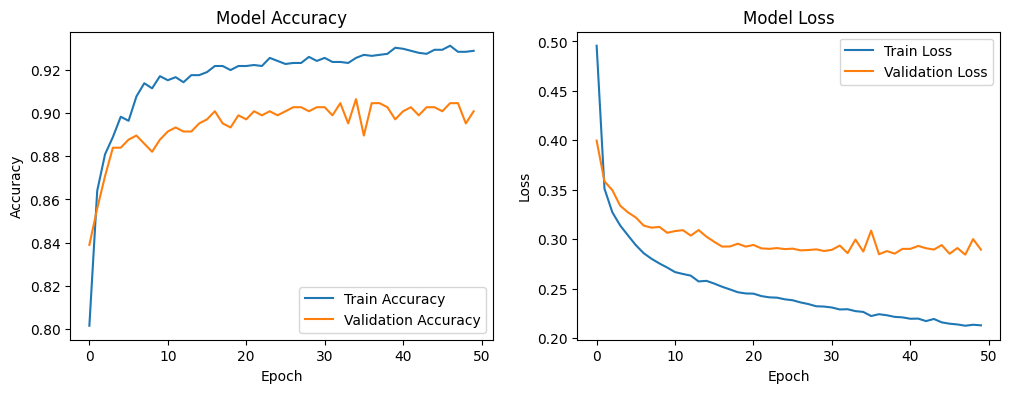

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import pickle

# Load Dataset
df = pd.read_csv('/content/telecom_churn.csv')

df.columns = df.columns.str.strip()
print(df.info())
print(df.head())

# Convert Churn to integer
df['Churn'] = df['Churn'].astype(int)

# Define target variable
target = 'Churn'

# Define selected features (7 features as per your API)
features = [
    'Account length',
    'International plan',
    'Voice mail plan',
    'Total day minutes',
    'Total eve minutes',
    'Total night minutes',
    'Total intl minutes'
    # Removed 'Customer service calls' to match your API
]

# Drop all other columns to keep only selected features and target
df = df[features + [target]]

# Encode categorical variables
label_encoders = {}
for col in ['International plan', 'Voice mail plan']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Save label encoders
with open('label_encoders.pkl', 'wb') as f:
    pickle.dump(label_encoders, f)
print("Label encoders saved as label_encoders.pkl")

# Define target and features
X = df[features]
y = df[target]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Save scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
print("Scaler saved as scaler.pkl")

# Build Keras model with input shape matching 7 features
model = Sequential([
    Dense(64, activation='relu', input_shape=(len(features),)),  # Now expects 7 features
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train,
                   epochs=50,
                   batch_size=32,
                   validation_split=0.2,
                   verbose=1)

# Make predictions
y_pred_proba = model.predict(X_test)
y_pred_keras = (y_pred_proba > 0.5).astype(int).ravel()

# Evaluation Metrics
def evaluate_model(name, y_test, y_pred):
    print(f"\n{name} Model Evaluation:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("ROC AUC:", roc_auc_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

evaluate_model("Keras Neural Network", y_test, y_pred_keras)

# Save the model
model.save('best_model_keras.h5')
print("Best model saved as best_model_keras.h5")

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [8]:
import pickle

# Save the scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

print("Scaler saved as scaler.pkl")

Scaler saved as scaler.pkl
